In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('avocado.csv')

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


    1. Column Unnamed can be dropped as it does not provide any value for the analysis.
    2. There may be some outliers present as there is wide gap between 75% and max values in most of the columns.
    3. We need to scale the dataset as range varies for each column.
    4. We can also drop date column.

In [6]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [7]:
#We can see that more than 60% of the data in this column has value as 0, hence we can drop this column.
df['XLarge Bags'].value_counts()

0.00        12048
3.33           29
6.67           16
1.11           15
5.00           12
            ...  
36.39           1
29342.75        1
724.83          1
7415.42         1
118.86          1
Name: XLarge Bags, Length: 5588, dtype: int64

# Data Visualization

In [8]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


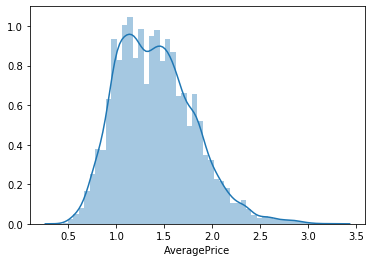

In [9]:
sns.distplot(df['AveragePrice'])

    Average price of Avocados ranges between 0.5 and 3.0

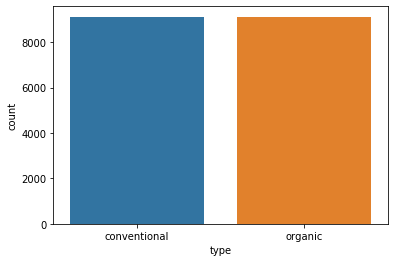

In [10]:
sns.countplot(df['type'])

      Two types of avocados are grown - conventional and oragnic.

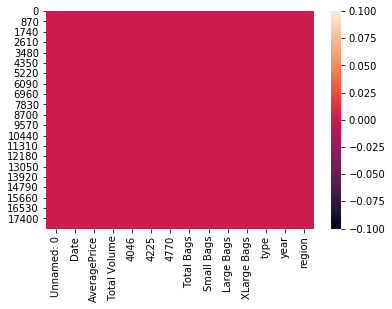

In [11]:
sns.heatmap(df.isnull())

    No null values.

# Data Manipulation

In [12]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop('Date',axis=1,inplace=True)
df.drop('XLarge Bags',axis=1,inplace=True)


In [13]:
#Move AveragePrice column to the end :
df = df[[c for c in df if c not in ['AveragePrice']] + ['AveragePrice']] 

In [14]:
#Encode the columns :
from sklearn.preprocessing import LabelEncoder

cols = ['type','region']
for each in cols:
    encoder = LabelEncoder()
    df[each] = encoder.fit_transform(df[each])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Total Volume  18249 non-null  float64
 1   4046          18249 non-null  float64
 2   4225          18249 non-null  float64
 3   4770          18249 non-null  float64
 4   Total Bags    18249 non-null  float64
 5   Small Bags    18249 non-null  float64
 6   Large Bags    18249 non-null  float64
 7   type          18249 non-null  int32  
 8   year          18249 non-null  int64  
 9   region        18249 non-null  int32  
 10  AveragePrice  18249 non-null  float64
dtypes: float64(8), int32(2), int64(1)
memory usage: 1.4 MB


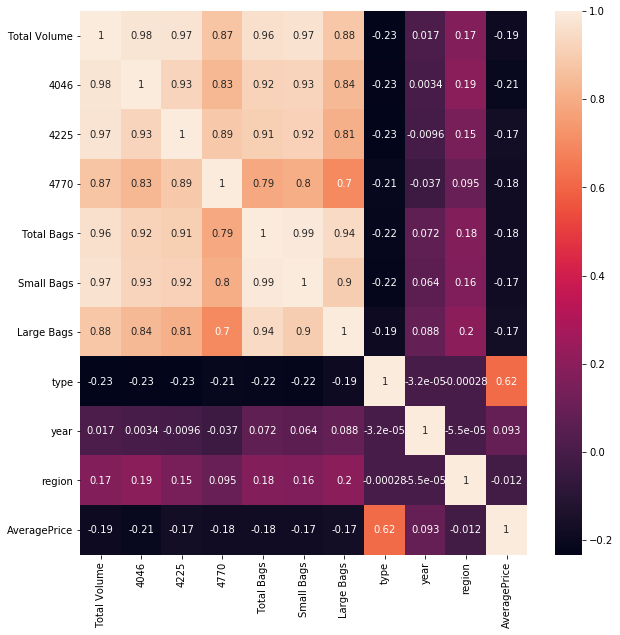

In [15]:
#Find correlation between variables :
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

    1. column type,year are positively related to target variable average price.
    2. Bag sizes and avocado types are positively related to target variable region.

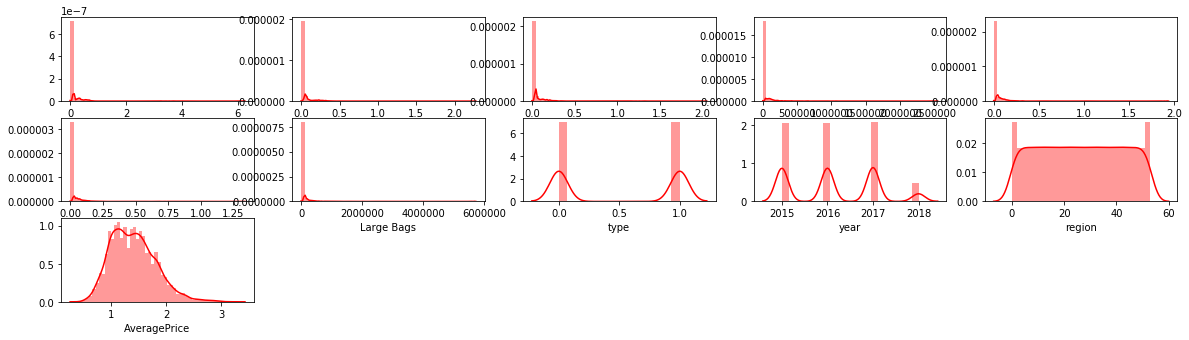

In [16]:
#Check for skewness
col = df.columns.values
plt.figure(figsize=(20,20))
for i in range(0,len(col)):
    plt.subplot(11,5,i+1)
    sns.distplot(df[col[i]],color='red')
plt.show()

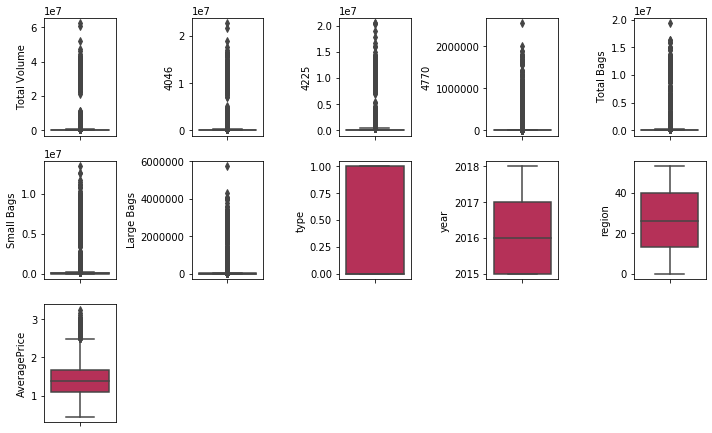

In [17]:
#Check for outliers :
plt.figure(figsize=(10,20))
for i in range(0,len(col)):
    plt.subplot(10,5,i+1)
    sns.boxplot(df[col[i]],palette='rocket',orient='v')
    plt.tight_layout()

    Many outliers are present.

In [18]:
#Use z-score to remove outliers :
from scipy.stats import zscore
#data.info()
z=np.abs(zscore(df))
print(np.where(z>3))
#new df with no outliers.
df_new = df[(z<3).all(axis=1)]

(array([  346,   359,   783, ..., 17304, 17402, 17428], dtype=int64), array([ 1,  1,  3, ..., 10, 10, 10], dtype=int64))


In [19]:
print(df.shape,"\t",df_new.shape)

(18249, 11) 	 (17736, 11)


In [20]:
from sklearn.model_selection import train_test_split

#Features where AveragePrice is the target variable
x = df_new.drop('AveragePrice',axis=1)
y = df_new.iloc[:,-1:]

#Features where region is the target variable.
X = df_new.drop('region',axis=1)
Y = df_new.iloc[:,-2:-1]

In [21]:
#Check for skewness for both independent variables.
x.skew()

Total Volume    3.668336
4046            4.702134
4225            4.305257
4770            4.972602
Total Bags      3.979019
Small Bags      4.217194
Large Bags      4.939150
type           -0.027971
year            0.225579
region          0.015564
dtype: float64

In [22]:
X.skew()

Total Volume    3.668336
4046            4.702134
4225            4.305257
4770            4.972602
Total Bags      3.979019
Small Bags      4.217194
Large Bags      4.939150
type           -0.027971
year            0.225579
AveragePrice    0.382151
dtype: float64

In [23]:
#To remove skewness :
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer('yeo-johnson')
X = pd.DataFrame(pt.fit_transform(X))
x = pd.DataFrame(pt.fit_transform(x))

In [24]:
x.skew()

0   -0.007418
1   -0.038752
2   -0.044355
3    0.023088
4   -0.020681
5   -0.022020
6   -0.110487
7   -0.027971
8    0.223316
9   -0.256886
dtype: float64

In [25]:
X.skew()

0   -0.007418
1   -0.038752
2   -0.044355
3    0.023088
4   -0.020681
5   -0.022020
6   -0.110487
7   -0.027971
8    0.223316
9    0.000733
dtype: float64

# PART A - Predict Average Price

In [26]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression as LR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [27]:
model = [LR(),DTR(),KNR(),SVR(),Lasso(),Ridge(),ElasticNet()]

for i in range(len(model)):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=40)
    model[i].fit(x_train,y_train)
    y_pred = model[i].predict(x_test)
    r2Score = r2_score(y_test,y_pred)
    
    print("*************************************************************************************")
    print(model[i])
    print("R2 Score : ",r2Score)
    print("Mean Absolute Error : " ,mean_absolute_error(y_test,y_pred))
    print("Mean Squared Error : " ,mean_squared_error(y_test,y_pred))
    print("Root Mean Squared Error : " ,np.sqrt(mean_squared_error(y_test,y_pred)))
    print("")
    print("*************************************************************************************")



*************************************************************************************
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2 Score :  0.541283094753503
Mean Absolute Error :  0.20846503093664193
Mean Squared Error :  0.07031447145982116
Root Mean Squared Error :  0.26516876033918696

*************************************************************************************
*************************************************************************************
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
R2 Score :  0.6761963852684387
Mean Absolute Error :  0.14583990980834274
Mean Squared Error :  0.

    KNeighbor Regressors performed best with 84.87% accuracy.

In [28]:
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(KNR(),x,y,cv=5,scoring='r2')
print("*************************************************************************************")
print("Score for ",KNR()," : ")
print("Score : ", cv_score)
print("Mean : ", cv_score.mean())
print("Standard Deviation : ", cv_score.std())
print("*************************************************************************************")
print("")

*************************************************************************************
Score for  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')  : 
Score :  [-0.07027499  0.19132697  0.43662541  0.23537841 -0.11684639]
Mean :  0.13524188288424852
Standard Deviation :  0.20483680182009148
*************************************************************************************



In [29]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors':list(range(1,31)),'weights':['uniform','distance']}

gridsearch = GridSearchCV(KNR(),parameters,n_jobs=-1,pre_dispatch=2)
gridsearch.fit(x,y)
gridsearch.best_params_

{'n_neighbors': 30, 'weights': 'distance'}

In [30]:
def random_state_counter(model):
    max_r2_score=0
    for j in range(10,90):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=j)
        reg = model
        reg.fit(x_train,y_train)
        y_pred = reg.predict(x_test)
        score = r2_score(y_test,y_pred)
        if score>max_r2_score:
            max_r2_score = score
            final_state = j
    return final_state

In [31]:
knr = KNR(n_neighbors=30,weights='distance')
state = random_state_counter(knr)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state = state)
knr.fit(x_train,y_train)
score = knr.score(x_train,y_train)
print("Score for KNeighbors regression : ",score)
y_pred = knr.predict(x_test)
r2Score = r2_score(y_test,y_pred)
print("R2 Score for Linear Regression : ",r2Score)
print("Mean Squared Error : " ,mean_squared_error(y_test,y_pred))
print("Mean Absolute Error : " ,mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error : " ,np.sqrt(mean_squared_error(y_test,y_pred)))

Score for KNeighbors regression :  1.0
R2 Score for Linear Regression :  0.7995250025900861
Mean Squared Error :  0.030497018096693387
Mean Absolute Error :  0.1280350630323141
Root Mean Squared Error :  0.17463395459272343


In [32]:
#Adaboost Regressor and RandomforestRegressor
from sklearn.ensemble import AdaBoostRegressor as ABR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import RandomForestRegressor as RFR


In [33]:
ada = ABR(n_estimators=20,random_state=120)
gradient = GBR(n_estimators=20,random_state=13)
rfr = RFR(n_estimators=20,random_state=76)

boosting_model = [ada,gradient,rfr]

for i in range(len(boosting_model)):
    boost = boosting_model[i]
    boost.fit(x_train,y_train)
    pred = boost.predict(x_test)
    r2Score = r2_score(y_test,pred)
    print("-----------------------------------------------------------")
    print(boost)
    print("-----------------------------------------------------------")
    print("R2 Score : ", r2Score)
    print("\n")

-----------------------------------------------------------
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=20, random_state=120)
-----------------------------------------------------------
R2 Score :  0.5188374071499003


-----------------------------------------------------------
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=20,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=13, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False

    Out of all the models KNR performed best

In [34]:
knr.fit(x_train,y_train)
y_pred= knr.predict(x_test)
r2score = r2_score(y_test,y_pred)
print("R2 Score for KNeighbor Regressor : ",r2score)
print("Mean Absolute Error : " ,mean_absolute_error(y_test,y_pred))
print("Mean Squared Error : " ,mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error : " ,np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score for KNeighbor Regressor :  0.7995250025900861
Mean Absolute Error :  0.1280350630323141
Mean Squared Error :  0.030497018096693387
Root Mean Squared Error :  0.17463395459272343


In [35]:
from sklearn.externals import joblib

joblib.dump(knr,'KNRModel.obj')

knr_from_joblib = joblib.load('KNRModel.obj')

finalOutput = knr_from_joblib.predict(x_test)

In [36]:
#save final output to a csv file :
pd.DataFrame(finalOutput).to_csv("Avocado_Regressor_Output.csv")

# Part B : Find the Region 

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [38]:
def calBestRandomStateOf(model):
    max_score=0
    for i in range(40,100):
        x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.20,random_state=i)
        model.fit(x_train,y_train)
        pred = model.predict(x_test)
        score = r2_score(y_test,pred)
        if score>max_score:
            max_score = score
            final_state = i

    return final_state

In [39]:
model = [DecisionTreeClassifier(),KNeighborsClassifier()]

for i in range(len(model)):
    state = calBestRandomStateOf(model[i])
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.20,random_state=state)
    model[i].fit(x_train,y_train)
    score = model[i].score(x_train,y_train)
    y_pred = model[i].predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    classificationReport = classification_report(y_test,y_pred)
    confusionMatrix = confusion_matrix(y_test,y_pred)
    
    print("*************************************************************************************")
    print("Random State : ",state)
    print("Score of ",model[i]," is : ", score)
    print("Accuracy : ",accuracy*100,"% ")
    #print("Classification Report : \n")
    #print(classificationReport)
    #print("Confusion Matrix :\n ")
    #print(confusionMatrix)
    print("*************************************************************************************")


*************************************************************************************
Random State :  98
Score of  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')  is :  1.0
Accuracy :  80.04509582863585 % 
*************************************************************************************
*************************************************************************************
Random State :  85
Score of  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')  is :  0.918170284747674
A

In [40]:
#Cross Validation :
from sklearn.model_selection import cross_val_score

model = [DecisionTreeClassifier(),KNeighborsClassifier()]
for i in range(len(model)):
    cv_score = cross_val_score(model[i],X,Y,cv=4,scoring='accuracy')
    print("*************************************************************************************")
    print("Score for ",model[i]," : ")
    print("Score : ", cv_score)
    print("Mean : ", cv_score.mean())
    print("Standard Deviation : ", cv_score.std())
    print("*************************************************************************************")
    print("")

*************************************************************************************
Score for  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')  : 
Score :  [0.52593595 0.58231845 0.43166441 0.44068561]
Mean :  0.4951511050969779
Standard Deviation :  0.06233558911634062
*************************************************************************************

*************************************************************************************
Score for  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 

In [41]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors':list(range(1,31)),'weights':['uniform','distance']}

gridsearch = GridSearchCV(KNeighborsClassifier(),parameters,n_jobs=-1,pre_dispatch=2)

gridsearch.fit(X,Y)
gridsearch.best_params_
                        

{'n_neighbors': 3, 'weights': 'distance'}

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

knc = KNeighborsClassifier(n_neighbors=3,weights='distance')
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.20,random_state = 85)
knc.fit(x_train,y_train)
score = knc.score(x_train,y_train)
print("Score for KNeighbors Classifier : ",score)
y_pred = knc.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy Score for KNC : ",accuracy)
print("Mean Squared Error : " ,mean_squared_error(y_test,y_pred))
print("Mean Absolute Error : " ,mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error : " ,np.sqrt(mean_squared_error(y_test,y_pred)))

Score for KNeighbors Classifier :  1.0
Accuracy Score for KNC :  0.8892333709131905
Mean Squared Error :  44.84216459977452
Mean Absolute Error :  1.846674182638106
Root Mean Squared Error :  6.696429242497416


In [43]:
cv_score = cross_val_score(knc,X,Y,cv=4,scoring='accuracy')
print("*************************************************************************************")
print("Score for ",knc," : ")
print("Score : ", cv_score)
print("Mean : ", cv_score.mean())
print("Standard Deviation : ", cv_score.std())
print("*************************************************************************************")
print("")

*************************************************************************************
Score for  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')  : 
Score :  [0.62471809 0.62223726 0.45060893 0.47248534]
Mean :  0.5425124041497519
Standard Deviation :  0.08133858961484013
*************************************************************************************



In [44]:
#Adaboost Regressor and RandomforestRegressor
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.ensemble import RandomForestClassifier as RFC

ada = ABC(n_estimators=20,random_state=41)
gradient = GBC(n_estimators=20,random_state=162)
rfc = RFC(n_estimators=20,random_state=115)

boosting_model = [ada,gradient,rfc]

for i in range(len(boosting_model)):
    boost = boosting_model[i]
    boost.fit(x_train,y_train)
    pred = boost.predict(x_test)
    accuracyScore = accuracy_score(y_test,pred)
    print("-----------------------------------------------------------")
    print(boost)
    print("-----------------------------------------------------------")
    print("Accuracy Score : ", accuracyScore)
    print("\n")

-----------------------------------------------------------
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=20, random_state=41)
-----------------------------------------------------------
Accuracy Score :  0.07158962795941376


-----------------------------------------------------------
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=162, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=

    KNeighbors Classifier Works best of all models with 88.92% accuracy and hence will be our final model.

In [45]:
from sklearn.externals import joblib

joblib.dump(knc,'KNeigborsClassifierModel.obj')

knc_from_joblib = joblib.load('KNeigborsClassifierModel.obj')

final_output = knc_from_joblib.predict(x_test)

In [46]:
#save final output to a csv file :
pd.DataFrame(final_output).to_csv("Avocado_Classifier_Output.csv")